In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.utils import resample

# Storks deliver babies analysis

## Summary

The aim of this report is to use the data in `storks.csv` file (which is derived from the paper `Storks Deliver Babies (p =0.008) by Robert Matthews`) and perform the following analyses:

1. Develop and interpret two regression models predicting the number of births using the predictors:
    - number of storks for model 1
    - population size for model 2
    
1. Use bootstrapping to estimate the distribution of the difference in the $R^2$ parameter for the two models

1. Develop and interpret two regression models predicting the number of storks using the predictors:
    - land area for model 1
    - population density and area of suitable land for model 2

1. Use bootstrapping to estimate the distribution of the difference in the RMSE (root mean squared error) between the predicted and the actual values for the two models

The report is divided into 3 sections:

 1. Section 1 - Data Preparation<br>
     1. Importing the dataset
 
 2. Section 2 - Analysis of variability in number of births <br>
     1. Regression model 1
     1. Regression model 2
     1. Bootstrapping
     
 3. Section 3 - Predicting the number of storks<br>
     1. Regression model 1
     1. Regression model 2
     1. Bootstrapping

## Section 1 - Data Preparation

### Section 1A: Importing the dataset

Data is imported from `storks.csv` into a pandas dataframe called `storks`.

In [2]:
storks = pd.read_csv('storks.csv')
storks

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


Please note that the units are not included in the above table column headings but are as follows:
- `Area`: $km^2$
- `Storks`: number of breeding pairs
- `Humans`: $*1e6$ (number of)
- `BirthRate`: 1000s per year (number of)

## Section 2 - Analysis of variability in number of births

The aim of this section is to analyse two regression models with different predictors and comment on the variability in the number of births (target variable for both models).

### Section 2A: Regression model 1

The first regression model uses the number of storks as the predictor. The below creates the `X` matrix from the `Storks` column in the `storks` dataframe and the `y` values (target) from the `BirthRate` column in the `storks` dataframe. Then performing a simple linear regression to get the line of best fit using the ordinary least squares method, the relevant metrics from the model were as follows:

In [3]:
#model 1 - predictor is no. of storks, target is birth rate

X = np.column_stack([storks.Storks]) #predictor
y = np.array(storks.BirthRate) #target - converted to np array

regression = LinearRegression().fit(X,y)
print('The R2 coefficient of determination is %4.3f' % regression.score(X, y))
print('The intercept is %4.1f' % regression.intercept_)
print('The regression coefficients are:', regression.coef_)

The R2 coefficient of determination is 0.385
The intercept is 225.0
The regression coefficients are: [0.02879364]


The $R^2$ coefficient of determination of 0.385 implies that only 38.5% of the total variation of birth rate can be explained by this model which only has one predictor (number of storks). The intercept of 225 means that if there were no stork pairs, the model would predict a birth rate of 225,000 per year. The regression coefficient of ~0.03 implies that for every 1 new pair of breeding stork, the model predicts an increase in birth rate by roughly 28.8 births per year. 

The above regression model is fitted to the data and plotted below for visualisation. As it can be seen, there are many points that are far away from the regression line:

Text(0, 0.5, 'BirthRate (1000s per year)')

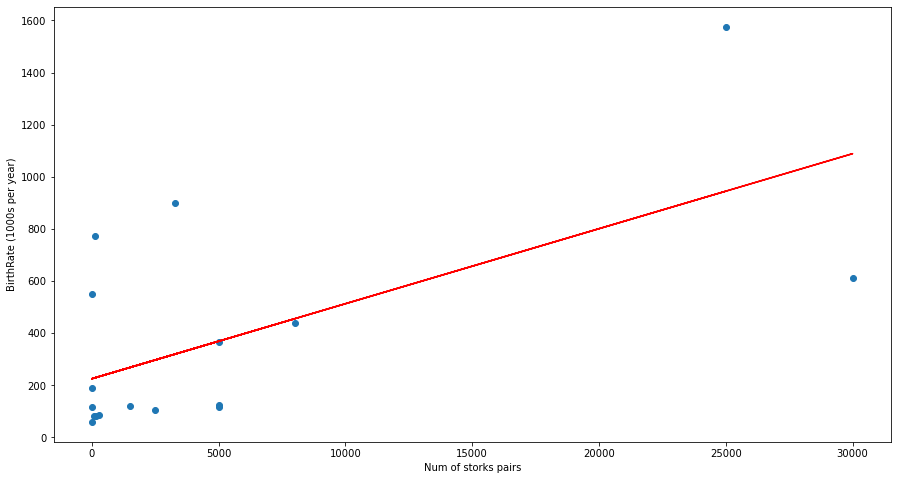

In [4]:
pred = regression.predict(X) #use the regression model to predict X

#plot observed values and model predicting X
fig, ax = plt.subplots(1,1, figsize = (15,8))
ax.scatter(storks.Storks, y)
ax.plot(storks.Storks, pred, 'r')
ax.set_xlabel('Num of storks pairs')
ax.set_ylabel('BirthRate (1000s per year)')


### Section 2B: Regression model 2

The second regression model uses the population of humans as the predictor. Note that the actual population is in 10^6 (number of). Repeating the same as in Section 2A, and carrying out the regression:

In [5]:
#model 2 - predictor is population, target is birth rate (y used from before)

X2 = np.column_stack([storks.Humans]) #predictor
regression2 = LinearRegression().fit(X2,y) #fit a regression model
print('The R2 coefficient of determination is %4.3f' % regression2.score(X2, y))
print('The intercept is %4.1f' % regression2.intercept_)
print('The regression coefficients are:', regression2.coef_)

The R2 coefficient of determination is 0.725
The intercept is -8.4
The regression coefficients are: [14.83444462]


The $R^2$ coefficient is 0.725 which is a much better fit compared to the previous model. 72.5% of the total variation in birth rates is explained by the human population. This obviously makes sense in context as the birth rates of humans are largely dependent on the population of humans and have nothing to do with the population of storks. The model also predicts that for an increase in human population by 1e6, the birth rate will increase by roughly 14.8/ year (interpreting the regression coefficient).

Plotting the actual values and the regression model below, it can be seen that the line is a much better fit with lower variance between actual and predicted values for most cases compared to the previous regression model.

Text(0, 0.5, 'Birth Rate (1000s per year)')

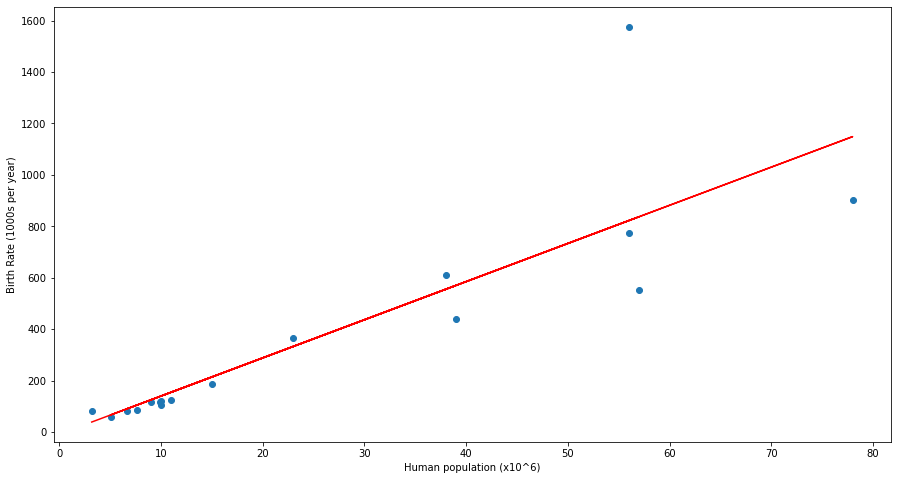

In [6]:
pred2 = regression2.predict(X2) #get the prediction for X2 using the regressino model above

fig, ax = plt.subplots(1,1, figsize = (15,8))

ax.scatter(storks.Humans, y)
ax.plot(storks.Humans, pred2, 'r')
ax.set_xlabel('Human population (x10^6)')
ax.set_ylabel('Birth Rate (1000s per year)')


### Section 2C: Bootstrapping

Bootstrap technique is used in this section to estimate the distribution of the difference in the $R^2$ parameter for the two models.

The below code cell defines the `bootstrapC` function that repeatedly resamples from the data and uses the `regression` function (defined in the same cell below) to return a dataframe consisting of three columns: `R2_diff` (difference in R^2 for the two models), `R2_Storks` (stores the R^2 values for model 1 from each resample), and `R2_humans` (stores the R^2 values for model 2 from each resample). Finally, the below code cell also calls the `bootstrapC` function and stores the data in dataframe `df`:

In [7]:
#bootstrap model 1 and model 2

# data - the sample; can be dataframe or an array
# cols - a list of column headings in the results dataframe
# repeats - the number of times the process is repeated
# func - the function that calculates the results for each sample: must return a value for each column

def bootstrapC(df, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(df)) # default is to resample, same size
    return result

#defining a function that creates regression models (same as the previous sections), and returns: the difference in the R^2 metrics, R^2 for model 1, and R^2 for model 2
def regression(df):
    X = np.column_stack([df.Storks]) #create X matrix for model 1
    y = df.BirthRate # target
    X2 = np.column_stack([df.Humans]) # create X matrix for model 2
    r2_1 = LinearRegression().fit(X,y).score(X,y) #fit model 1
    r2_2 = LinearRegression().fit(X2,y).score(X2,y) # fit model 2
    return r2_1 - r2_2, r2_1, r2_2 #model 1 r^2 - model 2 r^2

df = bootstrapC(storks, ['R2_diff', 'R2_Storks', 'R2_humans'], 1000, regression) #perform bootstrap and store in dataframe df.
print('df: \n',df)

df: 
       R2_diff  R2_Storks  R2_humans
0   -0.895794   0.049020   0.944813
1    0.031244   0.797797   0.766553
2   -0.675331   0.251064   0.926395
3   -0.244109   0.472767   0.716875
4   -0.261883   0.457975   0.719858
..        ...        ...        ...
995 -0.430155   0.346374   0.776530
996  0.086592   0.715384   0.628792
997 -0.497678   0.206629   0.704306
998 -0.366256   0.360019   0.726275
999 -0.410233   0.254847   0.665080

[1000 rows x 3 columns]


Note that the `R2_diff` column is the difference between $R^2$ for model 1 (`R2_Storks`) and $R^2$ for model 2 (`R2_humans`). Plotting the above as histograms:

array([[<AxesSubplot:title={'center':'R2_diff'}>,
        <AxesSubplot:title={'center':'R2_Storks'}>,
        <AxesSubplot:title={'center':'R2_humans'}>]], dtype=object)

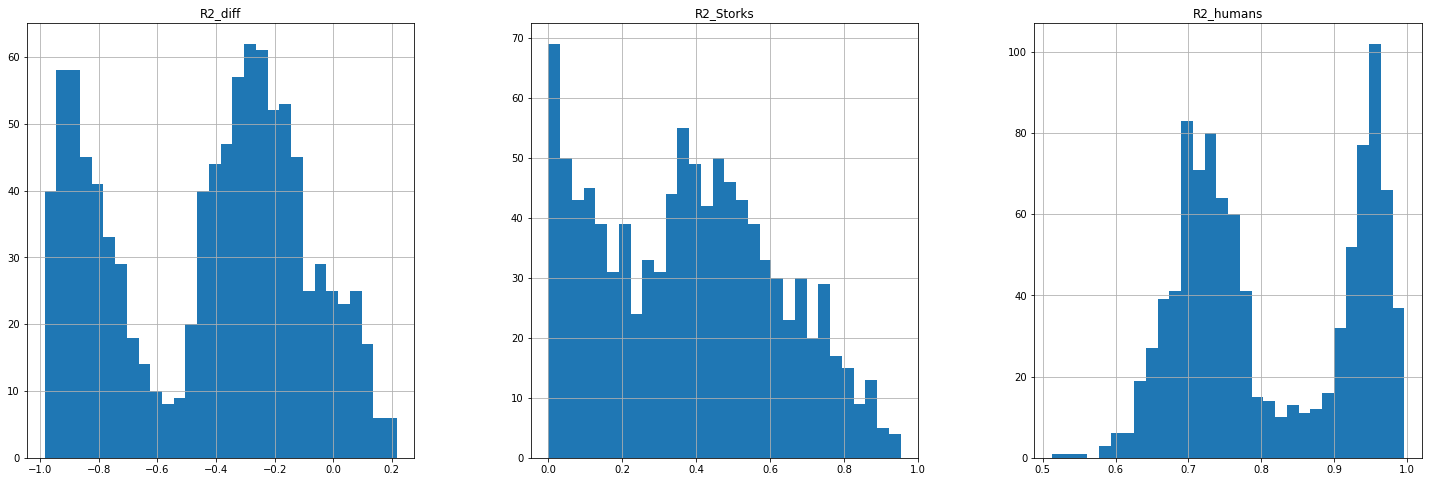

In [8]:
df.hist(figsize = (25,8), layout = (1,3), bins = 30)

Looking at the summary statistics for the above:

In [9]:
df.describe()

,R2_diff,R2_Storks,R2_humans
count,1000.000000,1.000000e+03,1000.000000
mean,-0.432567,3.784706e-01,0.811038
std,0.327687,2.412418e-01,0.117759
min,-0.984907,6.789386e-07,0.512830
25%,-0.775425,1.618132e-01,0.712647
50%,-0.353092,3.782628e-01,0.770164
75%,-0.180373,5.519915e-01,0.938296
max,0.216983,9.532816e-01,0.996358


Deriving the 80% and 95% confidence interval for the `R2_diff` values:

In [10]:
print('80%% range is %4.3f to %4.3f' % 
      (df.R2_diff.quantile(0.1), df.R2_diff.quantile(0.9)))
print('95%% range is %4.3f to %4.3f' % 
      (df.R2_diff.quantile(0.025), df.R2_diff.quantile(0.975)))

80% range is -0.902 to -0.022
95% range is -0.956 to 0.104


From the histograms, the summary statistics, and the estimated confidence intervals, the following can be concluded:

1. The lowest value of $R^2$ for model 2 (`R2_humans`) was ~0.5 after 1000  resamples compared to 0 for model 1 for the same no. of resamples.
1. Majority of `R2_diff` values are negative (75% of the data lies in the negative range). This implies that majority of the time, the $R^2$ value for model 2 is higher than the $R^2$ for model 1. This is backed up by the estimated confidence intervals. The 80% confidence interval contains only negative values implying that at least 80% of the time, the R^2 value for model 2 is higher than that for R1. Although the 95% confidence interval is made up of mostly negative values as well, the inclusion of values above 0 (albeit, marginal) prevents us from saying that model 2 will be better than model 1 95% of the time.   
1. From the above, it can be safely concluded (given the high number of resamples from the same data) that model 2 is better at explaining the total variability of the birth rate compared to model 1. As mentioned before, this supports common sense as the birth rate of humans is more likely to be affected by human population, rather than stork population.

## Section 3 - Predicting the number of storks

The aim of this section is to build and compare the performance of two regression models used to predicting the number of storks (target variable). 

### Section 3A: Regression model 1

The first regression model uses the land area as the predictor. The below creates the `X` matrix from the `Area` column in the `storks` dataframe and the `y` values (target) from the `Storks` column in the `storks` dataframe. Then, a simple linear regression to get the line of best fit using the ordinary least squares method is performed, and the relevant metrics from the model are displayed below:

In [11]:
#model 1 - predictor is land area, target is num of storks

X = np.column_stack([storks.Area]) #predictor
y = np.array(storks.Storks) #target - converted to np array

regression = LinearRegression().fit(X,y)

y_pred = regression.predict(X) #predicted y to calculated RMSE
print('The R2 coefficient of determination is %4.3f' % regression.score(X, y))
print('The intercept is %4.1f' % regression.intercept_)
print('The regression coefficients are:', regression.coef_)
print('The RMSE is: ', mean_squared_error(y, y_pred, squared = False))

The R2 coefficient of determination is 0.336
The intercept is -60.7
The regression coefficients are: [0.02330737]
The RMSE is:  6984.766863832696


Plotting the regression line on top of the actual data:

Text(0, 0.5, 'Number of stork pairs')

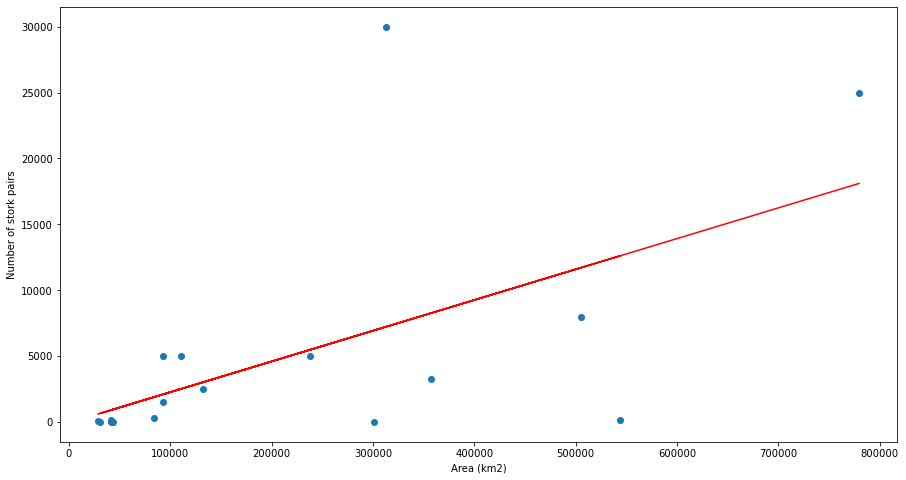

In [12]:
pred = regression.predict(X)

fig, ax = plt.subplots(1,1, figsize = (15,8))

ax.scatter(storks.Area, y)
ax.plot(storks.Area, pred, 'r')
ax.set_xlabel('Area (km2)')
ax.set_ylabel('Number of stork pairs')

The regression coefficient of 0.336 indicates that only 33.6% of the variation in the number of storks is explained (using `Area` as the predictor). The model also predicts that the minimum area required to have at least one stork pair is ~2647.2 km^2. Having an area below the aforementioned value results in the model predicting a negative number for pairs of storks. Since the goal is to predict the number of storks for a given area, a negative number does not make sense. The RMSE value is ~6985 which is the square root of the average of the residual errors. Examining the above plot of the observed values and the regression model, it seems like the presence of a couple of data points that are quite extreme may explain the negative intercept value. Having more data points and/ or excluding these outliers may improve the model. 

### Section 3B: Regression model 2

Instead of just one predictor, this regression model will use two:
- Population density: defined as `Humans * 10^6/Area` with the units $no. of humans/km^2$, and
- Suitable land area: defined as `SuitableAreaPercent /100` * `Area` with the units of km^2

The target variable is still `Storks`(num of storks). Building the regression model:

In [13]:
#model 2 - predictors are population density and suitable land area, target is num of storks (y same as before from 3A)

#humans converted from millions to actual value for ease of interpreting the coefficient, and suitable area percent divided by 100 for percentage
X2 = np.column_stack((storks.Humans*10**6/storks.Area, storks.SuitableAreaPercent * storks.Area/100)) 

regression2 = LinearRegression().fit(X2,y)
y_pred2 = regression2.predict(X2)
print('The R2 coefficient of determination is %4.3f' % regression2.score(X2, y))
print('The intercept is %4.1f' % regression2.intercept_)
print('The regression coefficients are:', regression2.coef_)
print('The RMSE is: ', mean_squared_error(y, y_pred2, squared = False))

The R2 coefficient of determination is 0.393
The intercept is 1881.4
The regression coefficients are: [-12.13259789   0.03670658]
The RMSE is:  6677.0286930693765


The R2 coefficient is marginally better compared to model 1 but still only explains 39.3% of the total variation. The coefficient of the population density predictor indicates that for all other things being equal, an increase in population density by 1 human/km^2 will result in a decrease in the stork pair population by roughly 12. Similarly, the suitable area predictor coefficient of 0.037 implies an increase in stork pair population by 37 for every 1000km^2 increase in suitable area (assuming nothing else changes). The intercept of 1881.4 implies a stork population of at least 1881 if the population density for humans is 0 and there is no available suitable area for storks. The RMSE of ~6677 is lower than that of model 1 indicating that this model is a better fit (backing up what was observed using the R2 value).

Plotting the residual errors against the predicted values (see below), it can be seen that quite a few points have really large errors in the thousands! A couple of predictions were also of negative stork pairs.

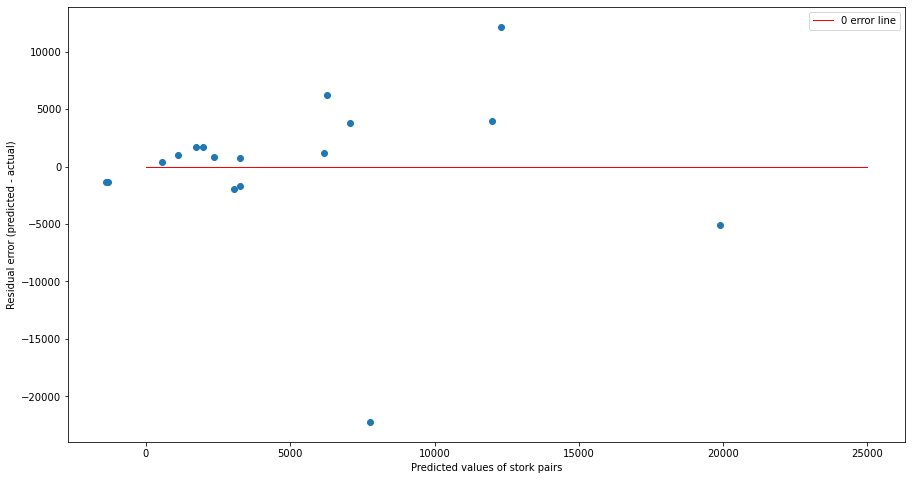

In [14]:
pred2 = regression2.predict(X2)

fig, ax = plt.subplots(1,1, figsize = (15,8))
res = pred2 - y
ax.scatter(pred2, res) #residual vs actual
ax.plot([0,25000],[0,0], color='red', linewidth=1, label = '0 error line')
ax.set_ylabel('Residual error (predicted - actual)')
ax.set_xlabel('Predicted values of stork pairs')
ax.legend()

To determine the more influential predictor, the full range of the data is used to determine the max change in the target variable brought about by changing each predictor over their respective range. From the below, it can be seen that the suitable land area predictor (`SuitableAreaPercent /100 * Area`) is the more influential predictor as it causes a 61% change in the number of storks when changed over its full range whereas the population density predictor only causes a 11.6% change in the number of storks when changed over its full range. 

In [15]:
#define the full range for the predictors and the target
pop_dens_range = (storks.Humans*10**6/storks.Area).quantile(1.0) - (storks.Humans*10**6/storks.Area).quantile(0.0) #population density range
suit_area_range = (storks.SuitableAreaPercent * storks.Area/100).quantile(1.0) - (storks.SuitableAreaPercent * storks.Area/100).quantile(0.0) #suitable area range
storks_range = storks.Storks.quantile(1.0) - storks.Storks.quantile(0.0) #no. of storks range

#calculate the change over the full range as a percentage
print ('The change in no. of storks (as a percent) given by the population density coefficient (over its range) is %4.1f percent'
       % (100 * (regression2.coef_[0] * pop_dens_range) / storks_range)) 

print ('The change in no. of storks (as a percent) given by the suitable area coefficient (over its range) is %4.1f percent'
       % (100 * (regression2.coef_[1] * suit_area_range) / storks_range))

The change in no. of storks (as a percent) given by the population density coefficient (over its range) is -11.6 percent
The change in no. of storks (as a percent) given by the suitable area coefficient (over its range) is 61.0 percent


### Section 3C: Bootstrap

In this section, the bootstrapping technique will be used to repeatedly sample the original dataframe, fit both models to each resample, and calculate the difference between the RMSE (root mean squared error) for both the models for each resample. The distribution of the RMSE difference is then plotted and a suitable confidence interval is determined to assess if one model is better than the other. 

The below performs the bootstrap, calculates the differences in the RMSE for 1000 resamples, and plots the differences as a distribution:

,RMSE_diff
0,357.380322
1,294.628867
2,346.733189
3,158.369153
4,324.197066
...,...
995,304.181321
996,116.100455
997,351.164262
998,163.256056


array([[<AxesSubplot:title={'center':'RMSE_diff'}>]], dtype=object)

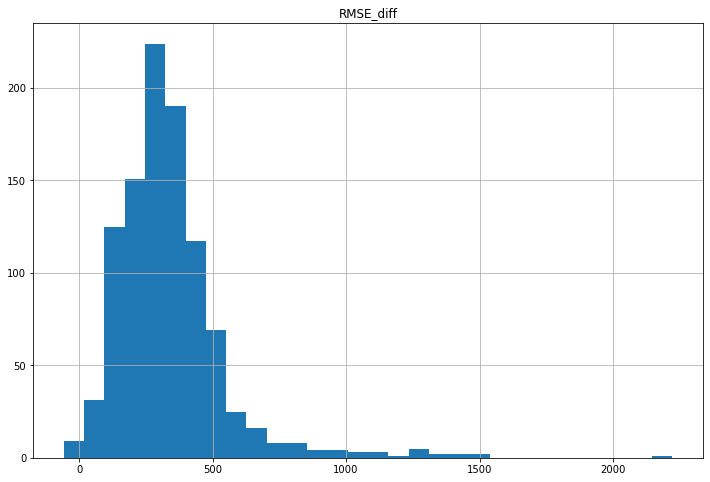

In [16]:
def rmse(df):
    X = np.column_stack([df.Area]) # model 1 X
    y = np.array(df.Storks) #target - converted to np array
    X2 = np.column_stack((df.Humans*10**6/df.Area, df.SuitableAreaPercent * df.Area/100)) #model 2 X
    reg1 = LinearRegression().fit(X,y)
    pred_1 = reg1.predict(X)
    reg2 = LinearRegression().fit(X2,y)
    pred_2 = reg2.predict(X2)
    return mean_squared_error(y, pred_1, squared=False) - mean_squared_error(y, pred_2, squared=False) #RMSE model 1 - RMSE model 2

df = bootstrapC(storks, ['RMSE_diff'], 1000, rmse) #call bootstrap with 1000 repeats

display(df)

df.hist(figsize = (12,8), bins = 30)

The above distribution shows that the majority of the difference values are positive. Deriving the 95% confidence interval:

In [17]:
print('95%% range is %4.3f to %4.3f' % 
      (df.RMSE_diff.quantile(0.025), df.RMSE_diff.quantile(0.975)))

95% range is 73.495 to 914.451


As it can be seen from the above, for a 95% confidence interval, all the values in the 95% CI range are positive. This indicates that the RMSE for model 1 is more likely (95% of the time at least) to be higher than that for model 2. Thus, model 2 (with the population density and the suitable area as predictors) is a better model to predict the number of storks.